### ***running  `Data_Preprocessing.ipynb` file***

In [2]:
#ignore warnings
import warnings 
warnings.filterwarnings("ignore")


In [3]:
%run  Data_Read.ipynb

In [4]:
Kandy = Kandy_df
Jaffna = Jaffna_df
Colombo = colombo_df
Kurunegala = Kurunegala_df
Deniyaya = Deniyaya_df
Bibile = Bibile_df
Nuwara_Eliya = Nuwara_Eliya_df


## `Stationary Test`

In [5]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller

def adfuller_test(HCHO):
    result=adfuller(HCHO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        


In [6]:
# adf test for all data frames location wise
print('Colombo Proper')
adfuller_test(colombo_df['HCHO Value'])
print('\nDeniyaya, Matara')
adfuller_test(Deniyaya_df['HCHO Value'])
print('\nNuwara Eliya Proper')
adfuller_test(Nuwara_Eliya_df['HCHO Value'])
print('\nKandy Proper')
adfuller_test(Kandy_df['HCHO Value'])
print('\nBibile, Monaragala')
adfuller_test(Bibile_df['HCHO Value'])
print('\nKurunegala Proper')
adfuller_test(Kurunegala_df['HCHO Value'])
print('\nJaffna Proper')
adfuller_test(Jaffna_df['HCHO Value'])


Colombo Proper
ADF Test Statistic : -4.676893959479641
p-value : 9.297802021990477e-05
#Lags Used : 14
Number of Observations Used : 1776
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Deniyaya, Matara
ADF Test Statistic : -15.479105034428477
p-value : 2.5701131485079442e-28
#Lags Used : 2
Number of Observations Used : 1760
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Nuwara Eliya Proper
ADF Test Statistic : -9.383191766909734
p-value : 6.869008945895899e-16
#Lags Used : 8
Number of Observations Used : 1780
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary

Kandy Proper
ADF Test Statistic : -9.164830150274641
p-value : 2.4768332405220822e-15
#Lags Used : 10
Number of Observations Used : 1765
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no

### ***`PDQ Order Function`***

***Using function to get the orders of the SARIMAX***

In [7]:

def get_pdq_values(df):
    from pmdarima import auto_arima
    stepwise_fit = auto_arima(df, start_p=0, start_q=0, max_p=4, max_q=4, m=12,
                              seasonal=True, trace=True, suppress_warnings=True, error_action="ignore", stepwise=True)
    return stepwise_fit.get_params()



# ***`Arima model`***

***Using a fucntion to evaluate the model***

In [8]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

def Evaluate(df, location, pdq_values, seasonal_order):
    # Split data into train and test sets (80% train, 20% test)
    train_size = int(len(df) * 0.8)
    train_data, test_data = df[:train_size], df[train_size:]

    # Define the order and seasonal_order for the SARIMA model
    order = pdq_values
    seasonal_order = seasonal_order

    # Fit SARIMA model
    model = SARIMAX(train_data['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Forecast for the test set
    forecast_values = results.predict(start=len(train_data), end=len(df)-1)

    # Store forecasted values in a DataFrame
    forecast_df = pd.DataFrame({'Date': test_data.index, 'HCHO Value': forecast_values})

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_data['HCHO Value'], forecast_values))
    mse = mean_squared_error(test_data['HCHO Value'], forecast_values)
    mae = mean_absolute_error(test_data['HCHO Value'], forecast_values)

    # Print evaluation metrics
    print(f"RMSE Score: {rmse}")
    print(f"MSE Score: {mse}")
    print(f"MAE Score: {mae}")

   


***Using def Function to forecast HCHO predictions for future***

In [10]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast(df, location,pdq_values,seasonal_order):
    # Create an empty DataFrame to store the forecasted values
    forecast_df = pd.DataFrame(columns=['Date', 'HCHO Value'])

    # Import today's date
    todays_date = datetime.datetime(2024, 1, 1)  # Corrected line

    # Define the order and seasonal_order for the SARIMA model
    order = pdq_values
    seasonal_order = seasonal_order  # Example seasonal order with a yearly seasonality

    # Fit SARIMA model
    model = SARIMAX(df['HCHO Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    #print(results.summary())

    # Forecast for 60 days from today's date (adjust as needed)
    forecast_steps = 60
    forecast_values = results.forecast(steps=forecast_steps)

    # Print the predicted values for the next 60 days and add them to the forecast DataFrame
    for i in range(forecast_steps):
        prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
        #print(f"{prediction_date}: {forecast_values.iloc[i]}")
        forecast_df = forecast_df.append({'Date': prediction_date, 'HCHO Value': forecast_values.iloc[i]}, ignore_index=True)

    # Display the forecast DataFrame
    #print(forecast_df)

    # Plot the training and forecasted values on the same plot
    plt.plot(df.index, df['HCHO Value'], label='Training Data', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['HCHO Value'], label='Forecasted Data', color='red')
    plt.title(f"Forecasted HCHO Values for {location}")
    plt.xlabel("Date")
    plt.ylabel("HCHO Value")
    plt.legend()
    plt.show()

    return forecast_df




## ***Kandy***

#### ***Kandy forecast***

In [17]:
get_pdq_values(Kandy_df['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-28705.619, Time=3.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28743.566, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28835.046, Time=2.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29221.325, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-26964.171, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29224.841, Time=0.76 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-28686.459, Time=3.68 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29145.560, Time=4.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29465.217, Time=0.85 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-28842.544, Time=2.60 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29444.526, Time=2.13 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-29344.748, Time=3.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-29457.717, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-29423.487, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

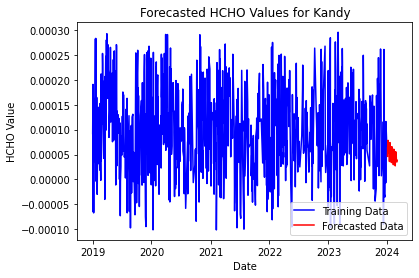

In [11]:
Kandy_forecast =  forecast(Kandy, 'Kandy',(2,0,2),(2,0,2,12))


#### ***Kandy Model Evaluation***

In [12]:
Evaluate(Kandy, 'Kandy',(2,0,2),(2,0,2,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE Score: 0.00010561726864664005
MSE Score: 1.1155007436376537e-08
MAE Score: 8.834630730144508e-05


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## ***Colombo***

In [20]:
get_pdq_values(Colombo['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28440.924, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28360.725, Time=1.84 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-28894.049, Time=2.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-25928.600, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-28855.829, Time=0.79 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-28930.122, Time=5.19 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-28617.045, Time=9.50 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-28543.272, Time=3.66 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-29193.958, Time=5.54 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29198.146, Time=2.68 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29191.839, Time=0.78 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.20 sec
 ARIMA(1,0,1

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 0, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

#### ***Colombo forecast***

In [21]:
get_pdq_values(Colombo['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28440.924, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28360.725, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-28894.049, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-25928.600, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-28855.829, Time=0.79 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.87 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-28930.122, Time=5.78 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-28617.045, Time=9.85 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-28543.272, Time=3.78 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-29193.958, Time=5.78 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29198.146, Time=2.78 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29191.839, Time=0.82 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(1,0,1

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

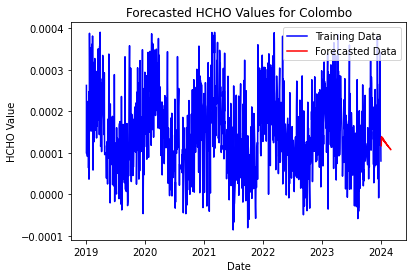

In [13]:
Colombo_forecast =  forecast(Colombo, 'Colombo',(4,0,3),(0,0,0,12))


#### ***Colombo Model Evaluation***

In [14]:
Evaluate(Colombo, 'Colombo',(4,0,3),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.00010008964382346295
MSE Score: 1.0017936800707675e-08
MAE Score: 7.906708916521163e-05


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## <center>***Bible***</center>

#### ***Bible forecast***

In [ ]:
get_pdq_values(Bibile['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-28541.627, Time=3.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28630.449, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28626.791, Time=1.88 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29083.313, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-26557.140, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29065.029, Time=0.74 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29076.663, Time=5.63 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29102.224, Time=4.92 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-29095.974, Time=9.12 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-28684.387, Time=3.35 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-29363.222, Time=5.55 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29365.550, Time=2.68 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29367.202, Time=0.75 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-28654.177, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

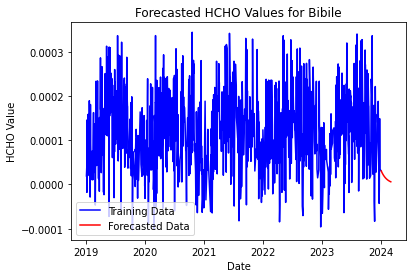

In [15]:
Bibile_forecast =forecast(Bibile, 'Bibile',(1,0,2),(0,0,0,12))

#### ***Bible Model Evaluation***

In [16]:
Evaluate(Bibile, 'Bibile',(1,0,2),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.00014213771606628325
MSE Score: 2.0203130328539358e-08
MAE Score: 0.00011964347153111204


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## <center>***Deniyaya***</center>

#### ***Deniyaya forecast***

In [ ]:
get_pdq_values(Deniyaya['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-28618.496, Time=2.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28725.509, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28928.103, Time=2.75 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29245.727, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-27113.242, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29259.139, Time=0.57 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-28743.086, Time=1.79 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29169.525, Time=3.85 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29483.901, Time=0.94 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-28923.645, Time=2.16 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29465.916, Time=1.08 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-29375.090, Time=3.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-29482.789, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-29426.178, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

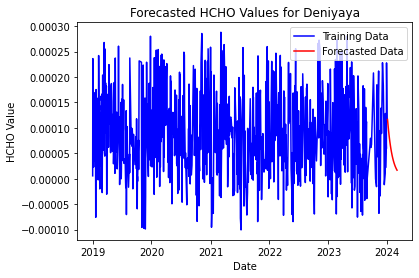

In [17]:
Deniyaya_forecast = forecast(Deniyaya, 'Deniyaya',(2,0,2),(0,0,0,12))

#### ***Deniyaya Model Evaluation***

In [18]:
Evaluate(Deniyaya, 'Deniyaya',(2,0,2),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.00010649720746952461
MSE Score: 1.134165519880697e-08
MAE Score: 8.622127923068206e-05


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## <center>***Jaffna***</center>

#### ***Jaffna forecast***

In [ ]:
get_pdq_values(Jaffna['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-29089.895, Time=3.97 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-29168.252, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28633.353, Time=2.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29335.790, Time=2.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-26750.831, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29326.931, Time=0.59 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-28761.418, Time=3.74 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29334.160, Time=5.60 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-28638.613, Time=1.94 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=9.28 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-29182.969, Time=1.78 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29397.307, Time=2.80 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29396.908, Time=0.77 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-29277.522, Time=5.82 se

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=se

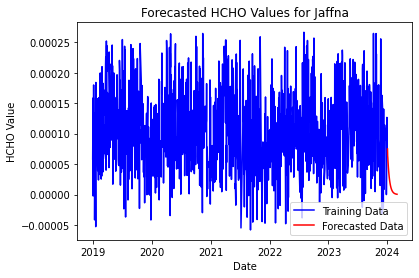

In [19]:
Jaffna_forecast = forecast(Jaffna, 'Jaffna',(2,0,0),(0,0,0,12))

#### ***Jaffna Model Evaluation***

In [20]:
Evaluate(Jaffna, 'Jaffna',(2,0,0),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.00012132334655387287
MSE Score: 1.4719354419031134e-08
MAE Score: 0.00010655976311839993


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## <center>***Kurunegala***</center>

#### ***Kurunegala forecast***

In [ ]:
get_pdq_values(Kurunegala['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-28661.200, Time=2.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-28857.505, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28677.064, Time=1.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29249.270, Time=2.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-26510.555, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29205.225, Time=0.65 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29025.761, Time=4.97 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29252.754, Time=5.48 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-29157.823, Time=9.50 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-28934.471, Time=3.67 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-29450.791, Time=6.89 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-29453.745, Time=2.67 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-29458.902, Time=0.77 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-28691.825, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 0, 4),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

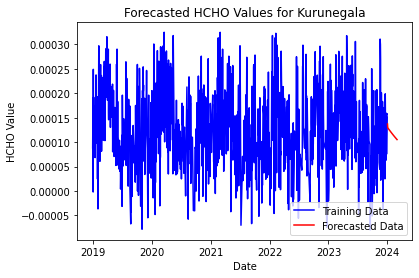

In [21]:
Kurunegala_forecast = forecast(Kurunegala, 'Kurunegala',(3,0,4),(0,0,0,12))

#### ***Kurunegala Model Evaluation***

In [22]:
Evaluate(Kurunegala, 'Kurunegala',(3,0,4),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.0001071150847180581
MSE Score: 1.1473641374156762e-08
MAE Score: 9.056524920070103e-05


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


## <center>***Nuwara Eliya***</center>

#### ***Nuwara Eliya forecast***

In [ ]:
get_pdq_values(Nuwara_Eliya['HCHO Value'].dropna())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-29133.973, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-29254.779, Time=0.16 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-29688.956, Time=2.57 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-29941.699, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-27685.680, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-29940.925, Time=0.31 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-29868.090, Time=3.30 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-29938.097, Time=4.83 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-29458.181, Time=2.27 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-29903.969, Time=9.83 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-29258.402, Time=1.97 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-30283.476, Time=2.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-30329.676, Time=1.11 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-29684.799, Time=

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\P

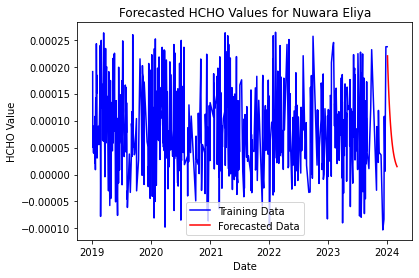

In [23]:
Nuwara_Eliya_forecast = forecast(Nuwara_Eliya, 'Nuwara Eliya',(1,0,2),(0,0,0,12))

#### ***Nwara Eliya Model Evaluation***

In [24]:
Evaluate(Nuwara_Eliya, 'Nuwara Eliya',(1,0,2),(0,0,0,12))

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE Score: 0.00011214621957240023
MSE Score: 1.2576774564381004e-08
MAE Score: 9.34224131769588e-05


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


***Saving Forecasted values with data frames and saving in a csv***



In [25]:
# combining forecaste values with data frams of each location
Kandy = Kandy.append(Kandy_forecast)
Colombo = Colombo.append(Colombo_forecast)
Bibile = Bibile.append(Bibile_forecast)
Deniyaya = Deniyaya.append(Deniyaya_forecast)
Jaffna = Jaffna.append(Jaffna_forecast)
Kurunegala = Kurunegala.append(Kurunegala_forecast)
Nuwara_Eliya = Nuwara_Eliya.append(Nuwara_Eliya_forecast)


In [26]:
# save data frames to csv files
Kandy.to_csv("forecasted csv's/Kandy.csv")
Colombo.to_csv("forecasted csv's/Colombo.csv")
Bibile.to_csv("forecasted csv's/Bibile.csv")
Deniyaya.to_csv("forecasted csv's/Deniyaya.csv")
Jaffna.to_csv("forecasted csv's/Jaffna.csv")
Kurunegala.to_csv("forecasted csv's/Kurunegala.csv")
Nuwara_Eliya.to_csv("forecasted csv's/Nuwara_Eliya.csv")


In [31]:
# set Date as index in all each data frame
Kandy.set_index('Date', inplace=True)
Colombo.set_index('Date', inplace=True)
Bibile.set_index('Date', inplace=True)
Deniyaya.set_index('Date', inplace=True)
Jaffna.set_index('Date', inplace=True)
Kurunegala.set_index('Date', inplace=True)



In [32]:
# combine all data frames in one csv as a final data frame
final_df = pd.concat([Kandy,Colombo,Bibile,Deniyaya,Jaffna,Kurunegala,Nuwara_Eliya], axis=1)
final_df.to_csv("final_df.csv")